In [1]:
import networkx as nx
import pandas as pd
import requests
import json
from dotenv import load_dotenv
import os

# Load and read environment variables from .env file
load_dotenv()
api_key = os.getenv("OPSCAN_API_KEY")


In [2]:
api_key

'94D9YVDRY38SAWC3J7R8D5C4Q75N22QCTX'

In [3]:
df=pd.read_csv('./token_house_proposals_votes.csv')

df = df.sort_values(by=['proposal_id', 'voting_power'], ascending=[True, False])

df_top_10 = df.groupby('proposal_id').head(10).reset_index(drop=True)


In [4]:
addresses = df_top_10.address.unique().tolist()

In [13]:
addresses=addresses[0:50]

In [14]:

# Function to get transactions for an address using Etherscan API
def get_transactions(address, api_key):
    url = f"https://api-optimistic.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&sort=asc&apikey={api_key}"
    response = requests.get(url)
    return response.json().get('result', [])

# Initialize a graph
G = nx.Graph()

# Fetch transactions and build the graph
for address in addresses:
    transactions = get_transactions(address, api_key)
    for tx in transactions:
        to_address = tx['to']
        from_address = tx['from']
        # Add edges to the graph
        G.add_edge(from_address, to_address)

# Analyze the graph
# Find connected components
connected_components = nx.connected_components(G)
for component in connected_components:
    print(component)



{'0x6352a56caadc4f1e25cd6c75970fa768a3304e64', '0x74fa01a5d0ef8039f1e14f4d4c8f90e8602e07b4', '0xcb96543b9f3657be103ba6371aaed8a711cc9e02', '0x9b4956614788ee33ed09bef11d1266a91c2fc628', '0x0b2c639c533813f4aa9d7837caf62653d097ff85', '0xb555edf5dcf85f42ceef1f3630a52a108e55a654', '0xee3ca4dd4ceb3416915eddc6cdadb4a6060434d4', '0x9aa90632bca10e2b24d69543d291f27848cf392d', '0xc0f8c29e3a9a7650a3f642e467d70087819926d6', '0xabc000d88f23bb45525e447528dbf656a9d55bf5', '0xf95d4be83e0b5c5d75d9cc86041bc6159f6a623f', '0xac3b9b3f5956b52c448158c0a07ddfa9d5c53a3b', '0x5e349eca2dc61abcd9dd99ce94d04136151a09ee', '0x362fa9d0bca5d19f743db50738345ce2b40ec99f', '0xe62267466c7600b6484be8ce8f87a3bbcde0fdde', '0x6d5ba400640226e24b50214d2bbb3d4db8e6e15a', '0x73ee044a4d88b71c5f82b776cde70573e0889715', '0x470f9522ff620ee45df86c58e54e6a645fe3b4a7', '0x8e1bd5da87c14dd8e08f7ecc2abf9d1d558ea174', '0xbb505c54d71e9e599cb8435b4f0ceec05fc71cbd', '0xa1dabef33b3b82c7814b6d82a79e50f4ac44102b', '0x22cd0e2680f4b9ae140e3b9abfa346

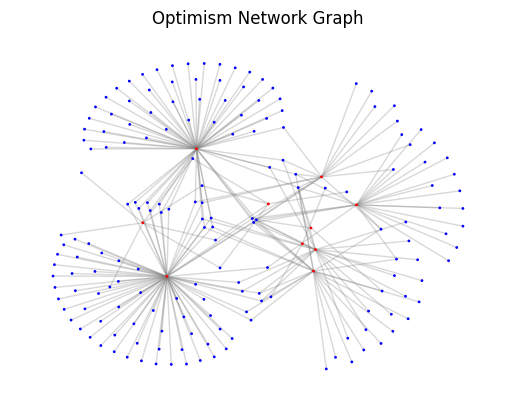

In [16]:
# Optional: visualize the graph
import matplotlib.pyplot as plt
# Set node and edge colors for visualization
node_color = 'blue'
edge_color = 'gray'
node_color = ['red' if node in addresses else 'blue' for node in G.nodes()]
# Customize node size based on degree (number of connections)
node_sizes = 1

# Visualize the graph
pos = nx.spring_layout(G)  # Positions nodes using the Fruchterman-Reingold force-directed algorithm
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, alpha=0.3)
# nx.draw_networkx_labels(G, pos)

plt.title("Optimism Network Graph")
plt.axis('off')  # Turn off axis
plt.show()
